## Import Libraries

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Reading

In [49]:
def read_csv_data():
    file_path = input("Enter the path to your CSV file: ").strip()
    
    if not os.path.exists(file_path):
        print("Error: File not found please provide a vaild path")
        return None
    
    if not file_path.endswith(".csv"):
        print("Error: Only CSV file are supported")
        return None
    
    
    try:
        df = pd.read_csv(file_path)
        print("File loaded successfully")
        print(f"Dataset shape: {df.shape}")
        print("Data Preview:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None
    

df = read_csv_data()

File loaded successfully
Dataset shape: (6684, 9)
Data Preview:
    Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

     Salary Country      Race  Senior  
0   90000.0      UK     White       0  
1   65000.0     USA  Hispanic       0  
2  150000.0  Canada     White       1  
3   60000.0     USA  Hispanic       0  
4  200000.0     USA     Asian       0  


## Data Summary



Data Summary
Rows Numbers: 6684
Columns Numbers: 9



Columns Data Types
Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


Missing Values
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64


Descriptve Statistics
                      count           mean           std    min      25%  \
Age                  6684.0      33.610563      7.595994   21.0     28.0   
Education Level      6684.0       1.622382      0.880474    0.0      1.0   
Years of Experience  6684.0       8.077723      6.029305    0.0      3.0   
Salary               6684.0  115307.175194  52806

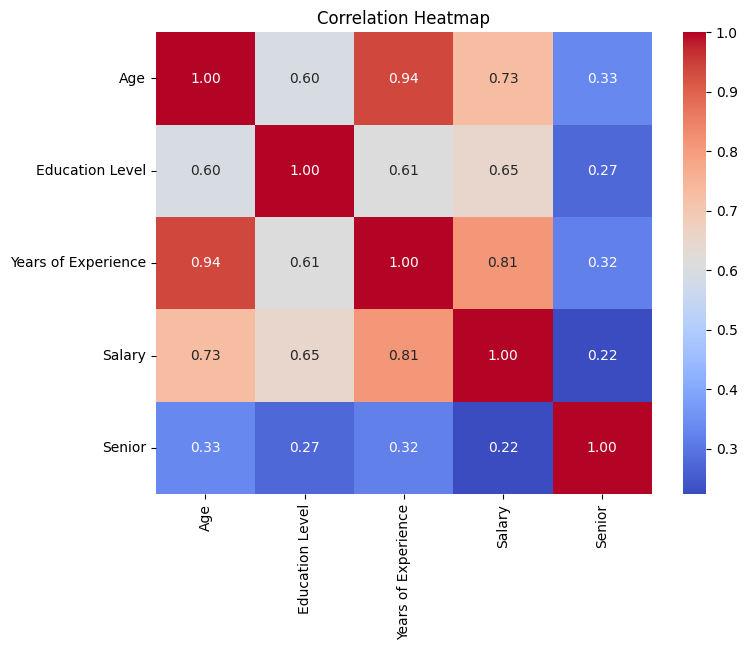

In [50]:
def data_summary(df):
    if df is None:
        print("No data available to summarize")
        return
    
    print("\n\nData Summary")
    print("="*40)
    
    print(f"Rows Numbers: {df.shape[0]}")
    print(f"Columns Numbers: {df.shape[1]}\n")
    
    print("\n\nColumns Data Types")
    print("="*40)
    print(df.dtypes)
    
    print("\n\nMissing Values")
    print("="*40)
    print(df.isna().sum())
    
    print("\n\nDescriptve Statistics")
    print("="*40)
    print(df.describe().T)
    
    print("\n\nCategorical Columns Summary")
    print("="*40)
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head())
        print(f"Unique Values: {df[col].nunique()}")
        
    print("\n\nCorrelation Matrix")
    print("="*40)
    corr = df.corr(numeric_only=True)
    print(corr)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
    
data_summary(df)

## Automating data pre processing

In [51]:
def preprocess_data(df):
    if df is None:
        print("No data available to preprocess")
        return None
    
    print("\nStarting Data Preproncessing")
    print("="*40)
    
    
    for col in df.columns:
        if df[col].isna().sum() > 0:
            if df[col].dtype in ['int64','float64']:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
                print(f"Filled missing values in numerical column '{col}' with median ({median_value})")
            else:
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
                print(f"Filled missing values in categorical column '{col}' with mode ('{mode_value}')")
    
    
    cat_cols = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    
    for col in cat_cols:
        if df[col].nunique() <= 2:
            df[col] = label_encoder.fit_transform(df[col])
            print(f"Applied Label Encoding on binary columns '{col}'")
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)
            print(f"Applied One Hot Encoding on column '{col}'")
            
            
    print("Data Preprocessing Completed")
    return df


df_preprocess = preprocess_data(df)
print("\nPreprocessed Data Preview")
print("="*40)


print(df_preprocess.head())


Starting Data Preproncessing
Applied Label Encoding on binary columns 'Gender'
Applied One Hot Encoding on column 'Job Title'
Applied One Hot Encoding on column 'Country'
Applied One Hot Encoding on column 'Race'
Data Preprocessing Completed

Preprocessed Data Preview
    Age  Gender  Education Level  Years of Experience    Salary  Senior  \
0  32.0       1                1                  5.0   90000.0       0   
1  28.0       0                2                  3.0   65000.0       0   
2  45.0       1                3                 15.0  150000.0       1   
3  36.0       0                1                  7.0   60000.0       0   
4  52.0       1                2                 20.0  200000.0       0   

   Job Title_Account Manager  Job Title_Accountant  \
0                      False                 False   
1                      False                 False   
2                      False                 False   
3                      False                 False   
4        

## Automating data visualiztion

Automated Visualization Completed

Starting Automated Data Visualiztion


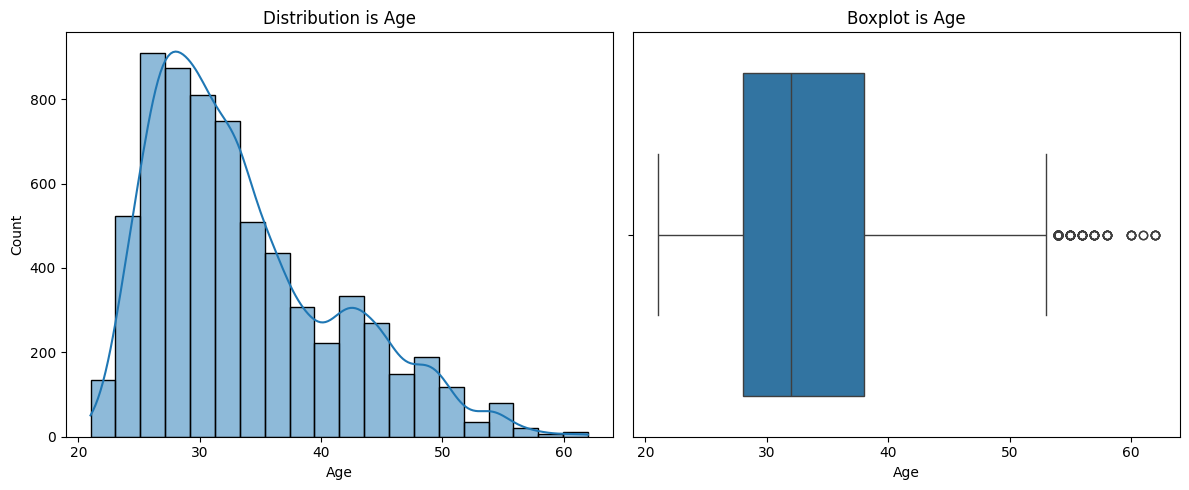

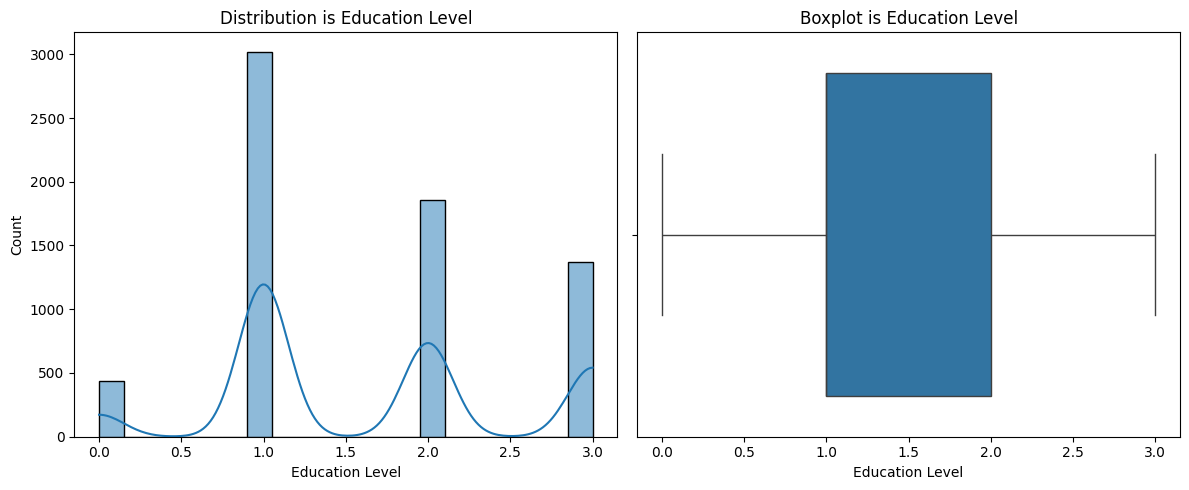

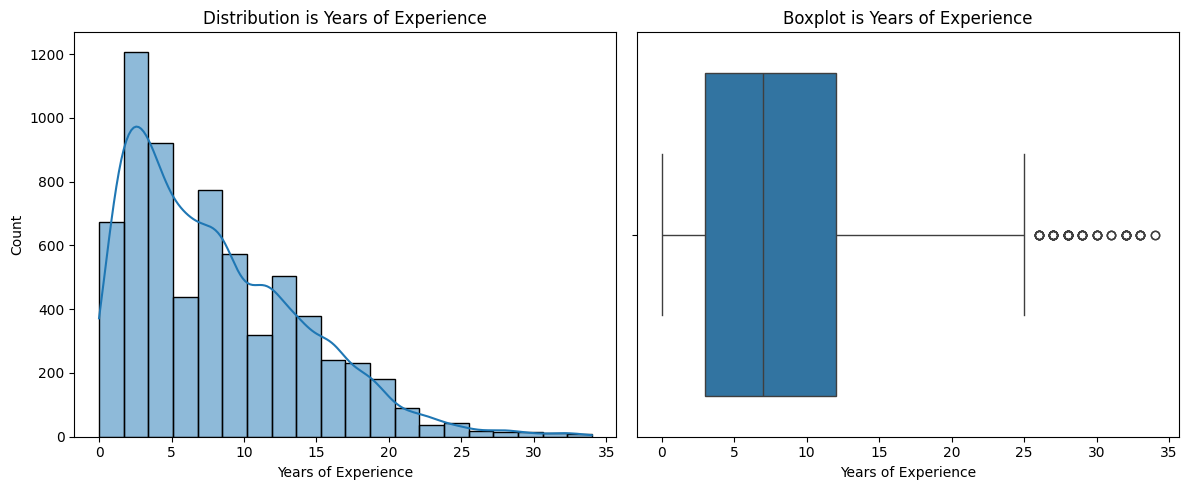

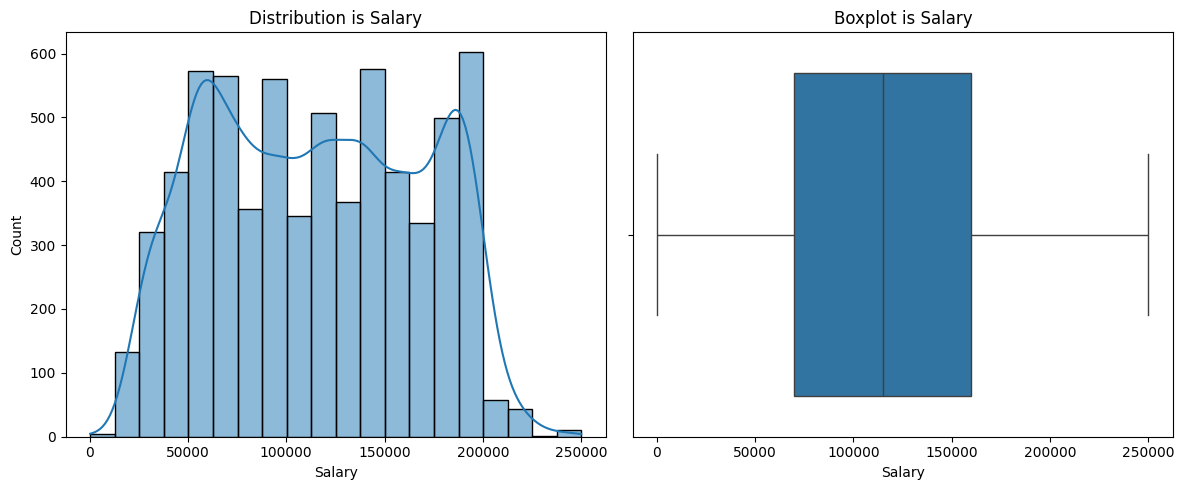

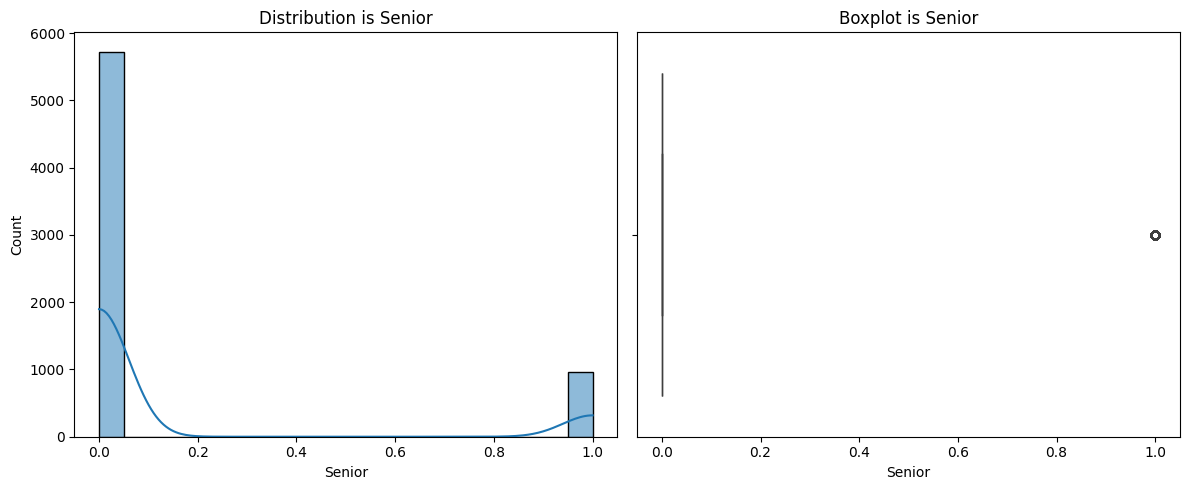

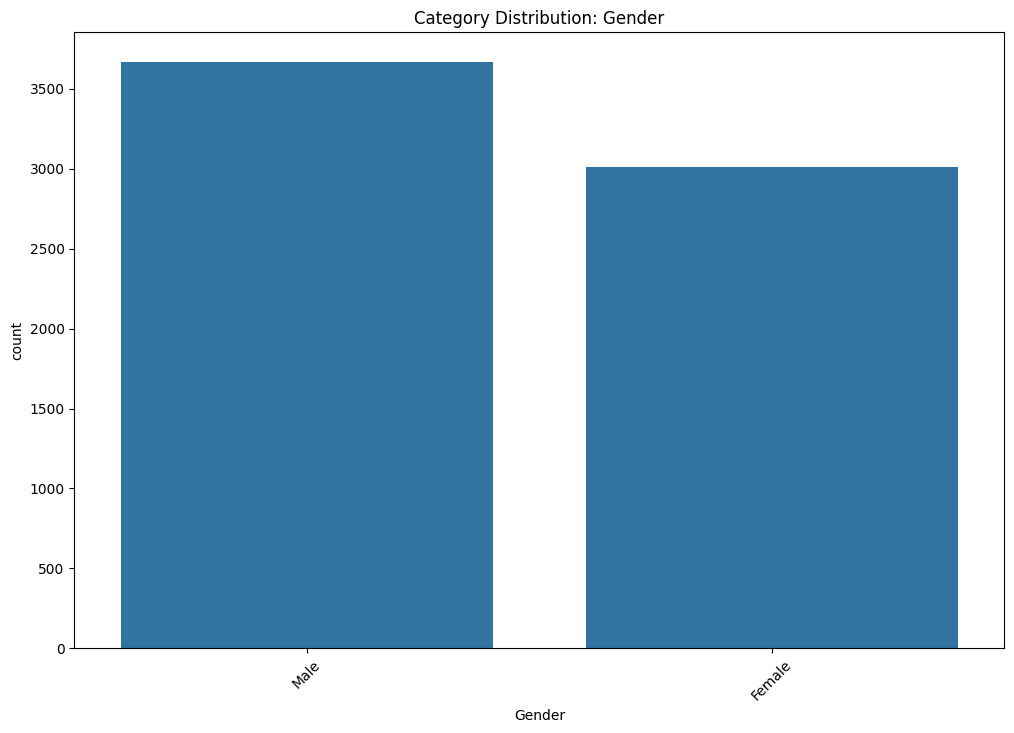

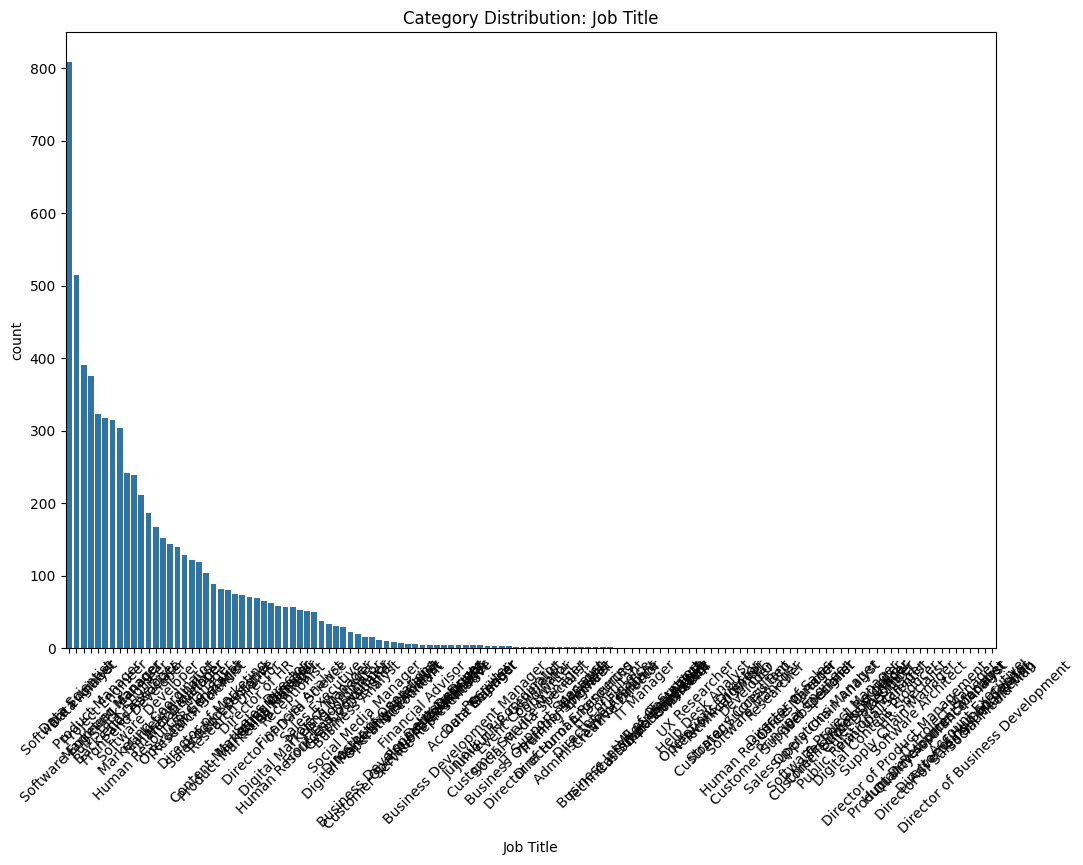

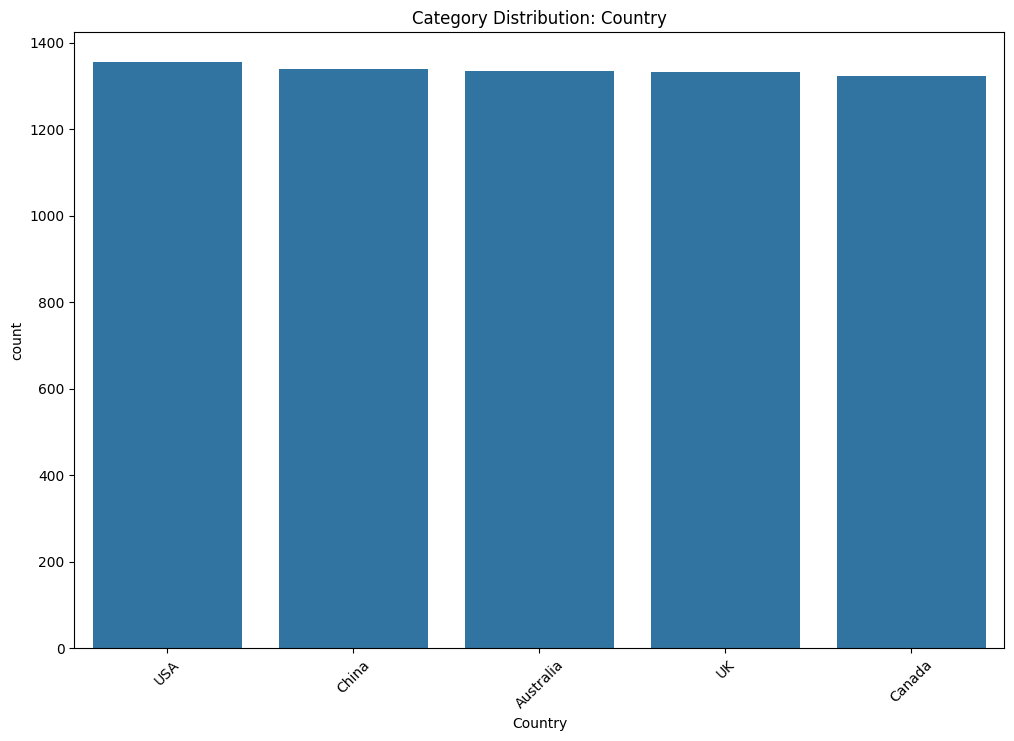

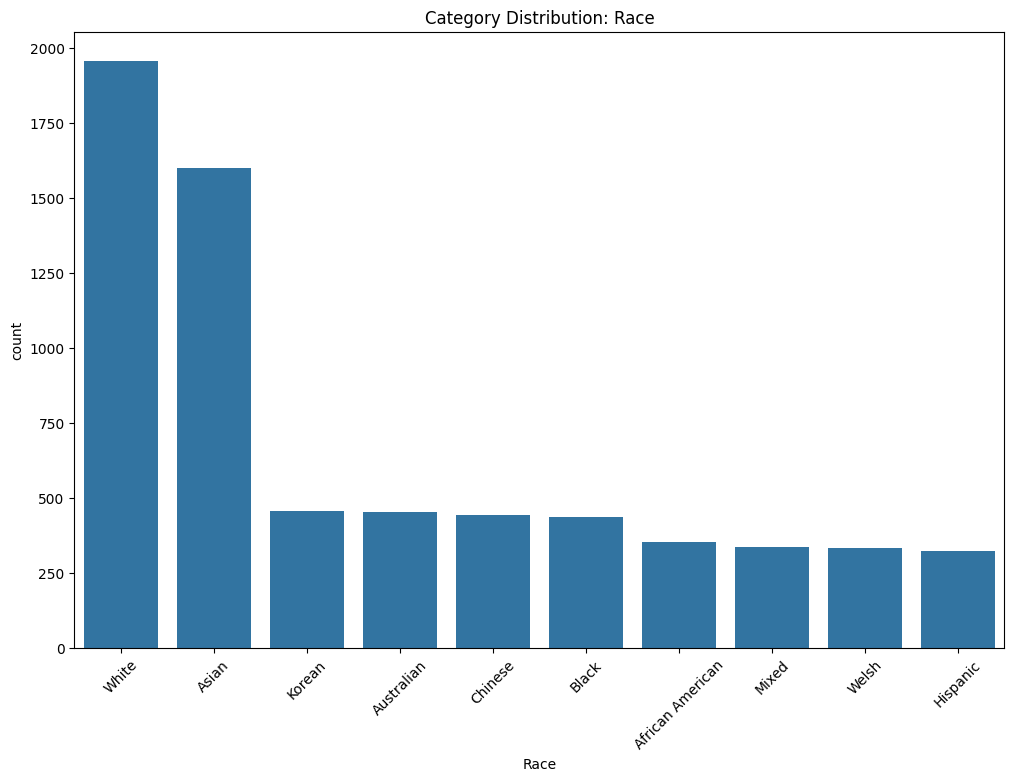

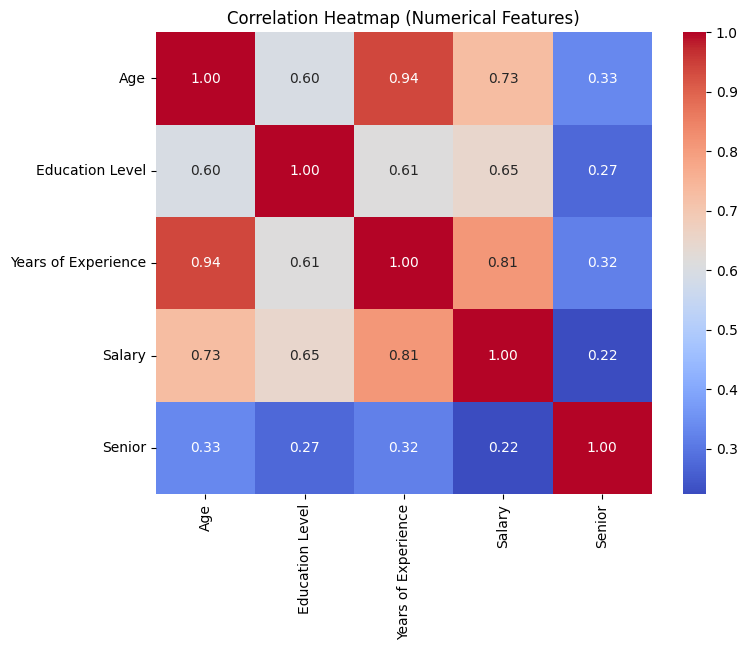

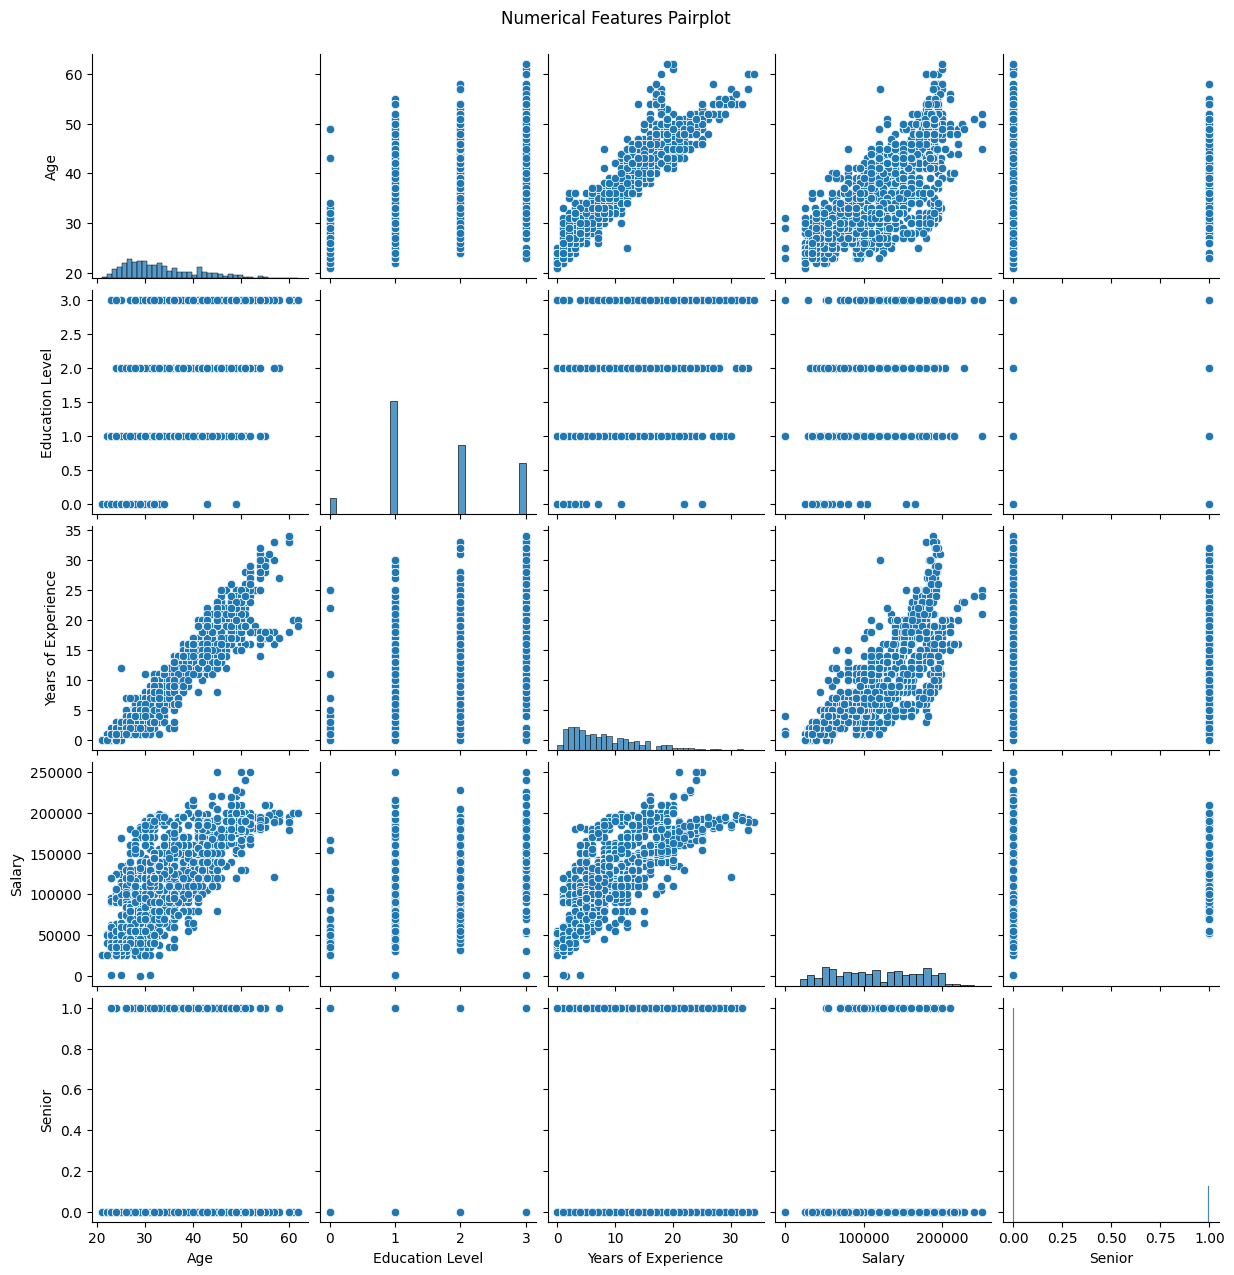

No data available for visualizton


In [73]:
def visualize_data(df):
    if df is None:
        print("No data available for visualizton")
        return


    print("\nStarting Automated Data Visualiztion")
    print("="*40)
    
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns
    
    
    for col in num_cols:
        plt.figure(figsize=(12,5))
        
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution is {col}")
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot is {col}")
        
        plt.tight_layout()
        plt.show()
    
    
    
    
    for col in cat_cols:
        plt.figure(figsize=(12,8))
        sns.countplot(x=df[col], order=df[col].value_counts().index)
        plt.title(f"Category Distribution: {col}")
        plt.xticks(rotation=45)
        plt.show()
        
        
        
        
    if len(num_cols) > 1:
        plt.figure(figsize=(8,6))
        corr = df[num_cols].corr()
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap (Numerical Features)")
        plt.show()
    
    
    
    
    if len(num_cols) <= 5:
        sns.pairplot(df[num_cols])
        plt.suptitle("Numerical Features Pairplot", y=1.02)
        plt.show()
        
        
print("Automated Visualization Completed")
df_visualization = visualize_data(df)
visualiztion = visualize_data(df_visualization)
visualiztion